In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read dataset
covid = pd.read_csv('../dataset/Cac_Binary_v2.csv')
covid.head()

,ID,AGE,GENDER,Test_PCR,Test_RTK,Test_Kit,CAT1,CAT2A,CAT2B,CAT3,...,HORMONE,MENTAL,NEUROLOGICAL,SKIN ALLERGY,SKIN,SYSTEMIC,THYROID,COVID HISTORY,ARTHRITIS,PLAN
0,1,17,MALE,YES,NO,NO,NO,NO,YES,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,ADMISSION
1,2,1,FEMALE,YES,NO,NO,NO,NO,YES,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,ADMISSION
2,3,3,MALE,NO,YES,NO,NO,NO,YES,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,ADMISSION
3,4,1,MALE,YES,NO,NO,NO,NO,YES,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,ADMISSION
4,5,4,FEMALE,NO,YES,NO,NO,NO,YES,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,ADMISSION


In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                6214 non-null   int64 
 1   AGE               6214 non-null   int64 
 2   GENDER            6214 non-null   object
 3   Test_PCR          6214 non-null   object
 4   Test_RTK          6214 non-null   object
 5   Test_Kit          6214 non-null   object
 6   CAT1              6214 non-null   object
 7   CAT2A             6214 non-null   object
 8   CAT2B             6214 non-null   object
 9   CAT3              6214 non-null   object
 10  CAT4              6214 non-null   object
 11  CAT5              6214 non-null   object
 12  WORKPLACE         6214 non-null   object
 13  DAY OF ILLNESS    6214 non-null   int64 
 14  VACCINATED        6214 non-null   object
 15  HAS_VACCED        6214 non-null   object
 16  NO_VACCED         6214 non-null   object
 17  TYPE OF VACCIN

In [4]:
covid.describe()

,ID,AGE,DAY OF ILLNESS,BMI
count,6214.000000,6214.000000,6214.000000,6214.000000
mean,3107.500000,31.099614,8.971838,26.900708
std,1793.971618,17.939888,5.409604,5.716345
min,1.000000,0.000000,1.000000,8.000000
25%,1554.250000,18.000000,4.000000,26.000000
50%,3107.500000,31.000000,10.000000,27.000000
75%,4660.750000,42.000000,11.000000,29.000000
max,6214.000000,89.000000,111.000000,188.000000


In [5]:
# drop id column
covid = covid.drop('ID', axis=1)

<AxesSubplot:xlabel='GENDER', ylabel='BMI'>

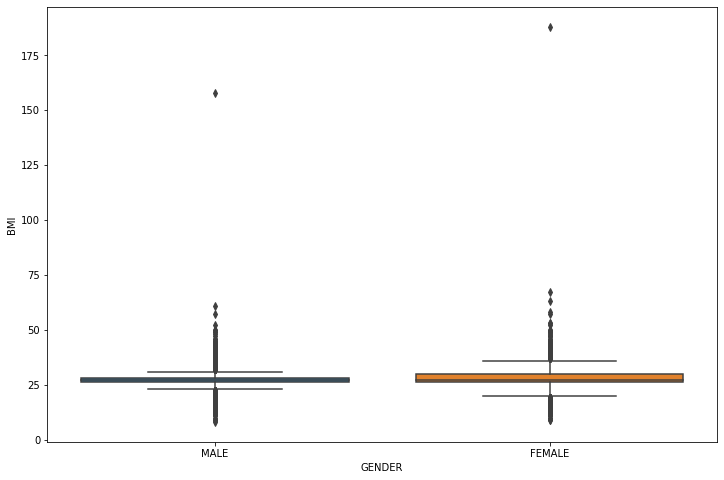

In [6]:
# Visualization looks bigger
# Put this code where seaborn code is located
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12,8)
sns.boxplot(x='GENDER', y='BMI', data=covid)

In [7]:
print(covid[covid.BMI > 125])

      AGE  GENDER Test_PCR Test_RTK Test_Kit CAT1 CAT2A CAT2B CAT3 CAT4  ...  \
1272   10    MALE      YES       NO       NO  YES    NO    NO   NO   NO  ...   
5841    7  FEMALE       NO      YES       NO   NO   YES    NO   NO   NO  ...   

     HORMONE  MENTAL   NEUROLOGICAL  SKIN ALLERGY SKIN  SYSTEMIC  THYROID   \
1272       NO      NO             NO           NO    NO        NO       NO   
5841       NO      NO             NO           NO    NO        NO       NO   

     COVID HISTORY ARTHRITIS       PLAN  
1272            NO        NO  ADMISSION  
5841            NO        NO  ADMISSION  

[2 rows x 48 columns]


In [8]:
covid.loc[covid['BMI'] > 125, ['AGE','GENDER']]

,AGE,GENDER
1272,10,MALE
5841,7,FEMALE


In [9]:
# Only include value bmi less than 125
covid = covid[covid['BMI'] < 125]

<AxesSubplot:xlabel='GENDER', ylabel='BMI'>

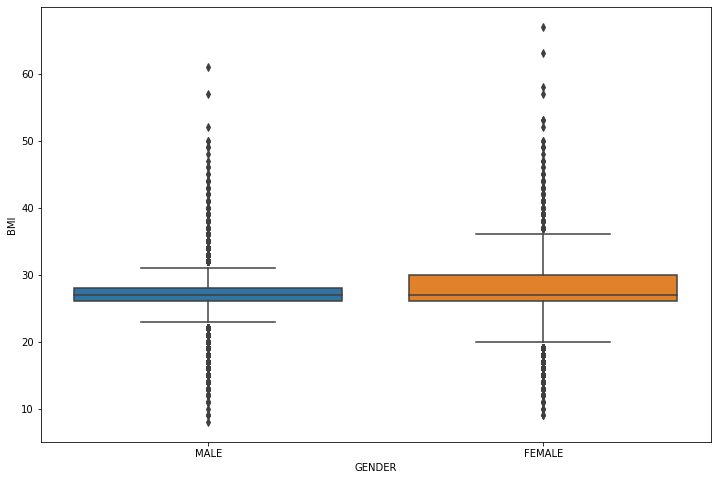

In [10]:
# Visualization looks bigger
# Put this code where seaborn code is located
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12,8)
sns.boxplot(x='GENDER', y='BMI', data=covid)

<AxesSubplot:xlabel='GENDER', ylabel='BMI'>

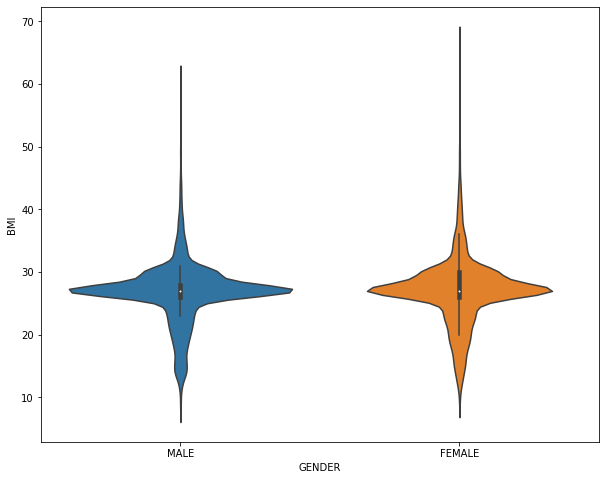

In [11]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(10,8)

sns.violinplot(x=covid['GENDER'], y=covid['BMI'])

Text(0, 0.5, 'Frequency')

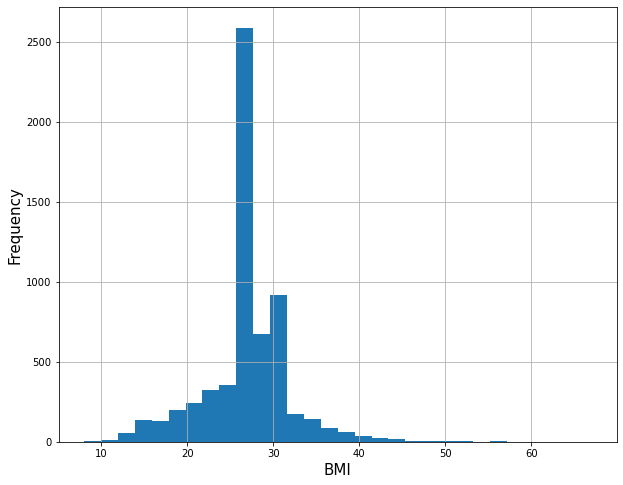

In [12]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(10,8)

# Histogram plot
covid['BMI'].hist(bins=30)
plt.xlabel("BMI", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

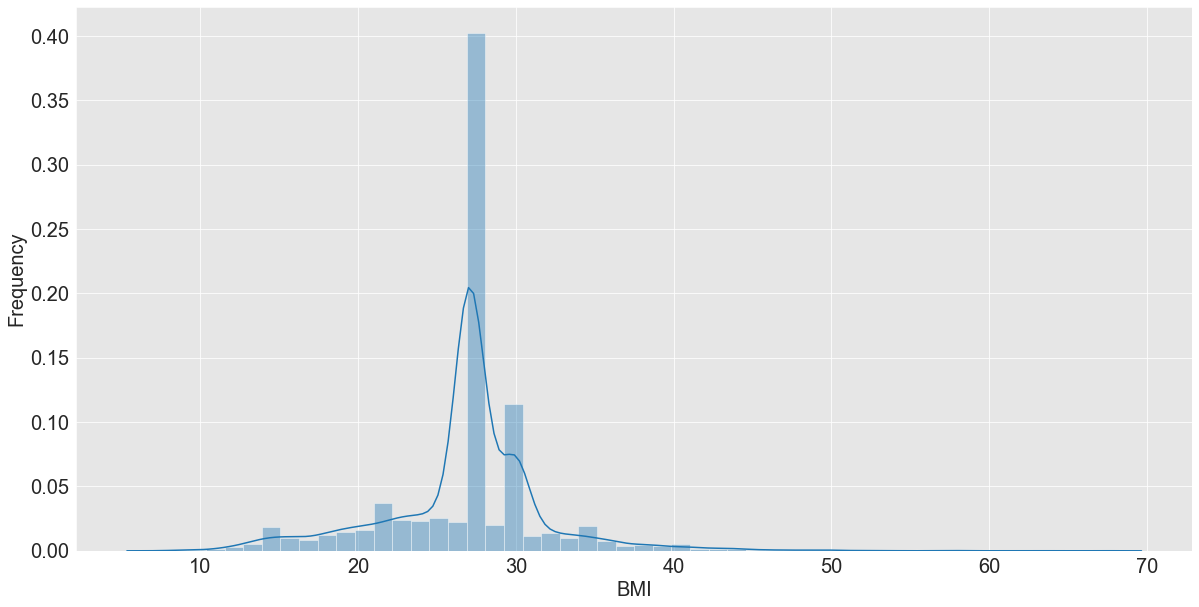

In [13]:
# Visualization looks bigger
# Put this code where seaborn code is located
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20,10)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.distplot(covid["BMI"])
ax.set_xlabel("BMI", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)
ax.tick_params(labelsize=20)

In [14]:
covid.describe()

,AGE,DAY OF ILLNESS,BMI
count,6212.000000,6212.000000,6212.000000
mean,31.106890,8.971829,26.853670
std,17.938171,5.410445,5.073379
min,0.000000,1.000000,8.000000
25%,18.000000,4.000000,26.000000
50%,31.000000,10.000000,27.000000
75%,42.000000,11.000000,29.000000
max,89.000000,111.000000,67.000000


<AxesSubplot:xlabel='GENDER', ylabel='DAY OF ILLNESS'>

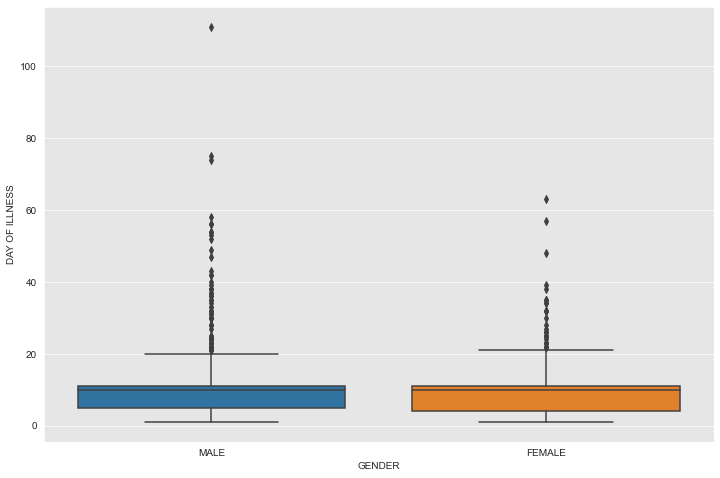

In [15]:
# Visualization looks bigger
# Put this code where seaborn code is located
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12,8)
sns.boxplot(x='GENDER', y='DAY OF ILLNESS', data=covid)

In [16]:
# print if 'DAY OF ILLNESS' is more than 60 with the AGE, GENDER AND DAY OF ILLNESS COLUMN
covid.loc[covid['DAY OF ILLNESS'] > 60, ['AGE','GENDER','DAY OF ILLNESS']]

,AGE,GENDER,DAY OF ILLNESS
6203,66,FEMALE,63
6206,28,MALE,74
6207,54,MALE,75
6209,46,MALE,111


In [17]:
# Only include value DAY OF ILLNESS less than 60
covid = covid[covid['DAY OF ILLNESS'] < 60]

<AxesSubplot:xlabel='GENDER', ylabel='DAY OF ILLNESS'>

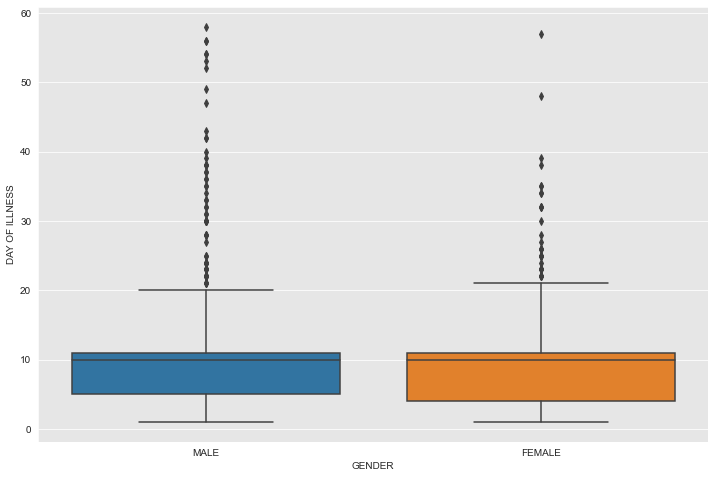

In [18]:
# Visualization looks bigger
# Put this code where seaborn code is located
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12,8)
sns.boxplot(x='GENDER', y='DAY OF ILLNESS', data=covid)

<AxesSubplot:xlabel='GENDER', ylabel='DAY OF ILLNESS'>

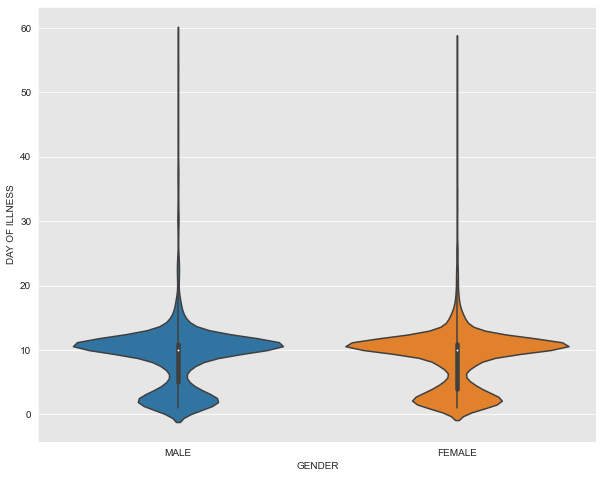

In [19]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(10,8)

sns.violinplot(x=covid['GENDER'], y=covid['DAY OF ILLNESS'])

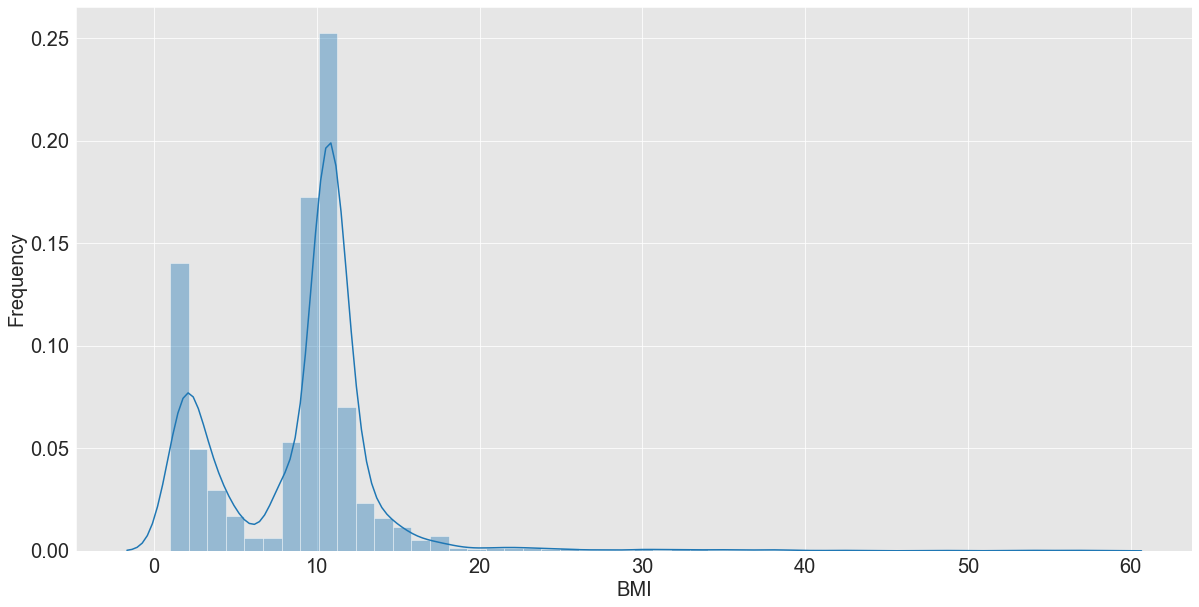

In [20]:
# Visualization looks bigger
# Put this code where seaborn code is located
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20,10)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.distplot(covid["DAY OF ILLNESS"])
ax.set_xlabel("BMI", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)
ax.tick_params(labelsize=20)

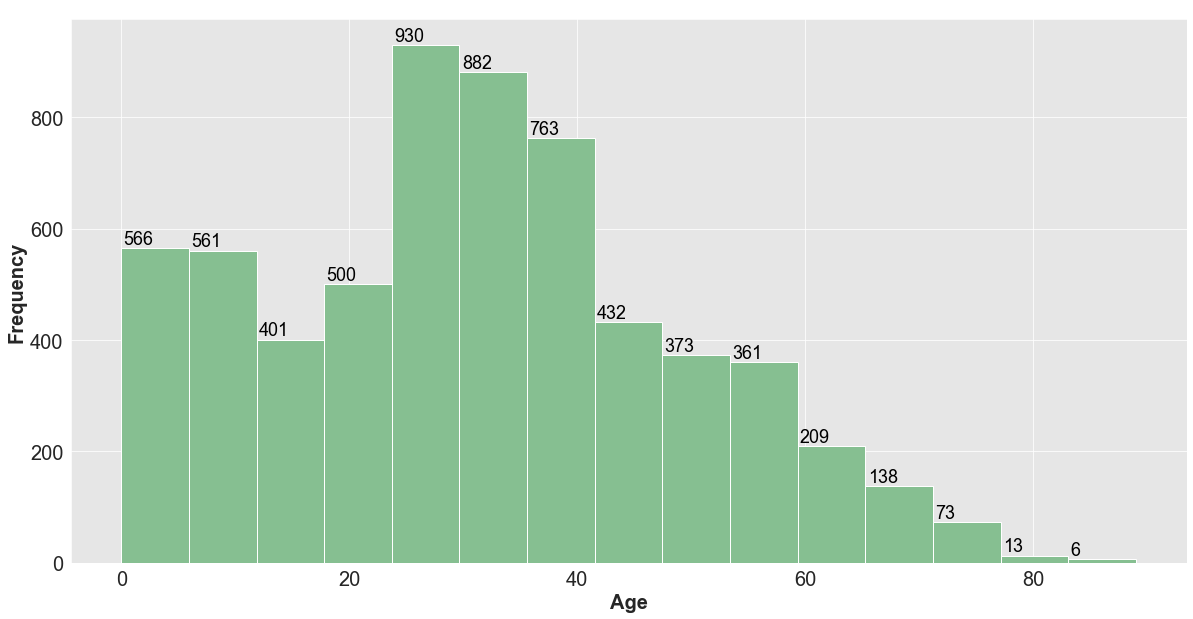

In [21]:
# Visualization looks bigger
# Put this code where seaborn code is located
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20,10)

x = covid['AGE'].hist(bins=15, color='#86bf91')

# Set x-axis label
x.set_xlabel("Age", weight='bold', size=20)

# Set y-axis label
x.set_ylabel("Frequency", weight='bold', size=20)

x.tick_params(which='both', labelsize=20)

for p in x.patches:
    x.annotate(f'\n{int(p.get_height())}', (p.get_x()+0.2, p.get_height()), ha='left', va='bottom', color='black', size=18)
plt.show()

<AxesSubplot:xlabel='CAT5', ylabel='count'>

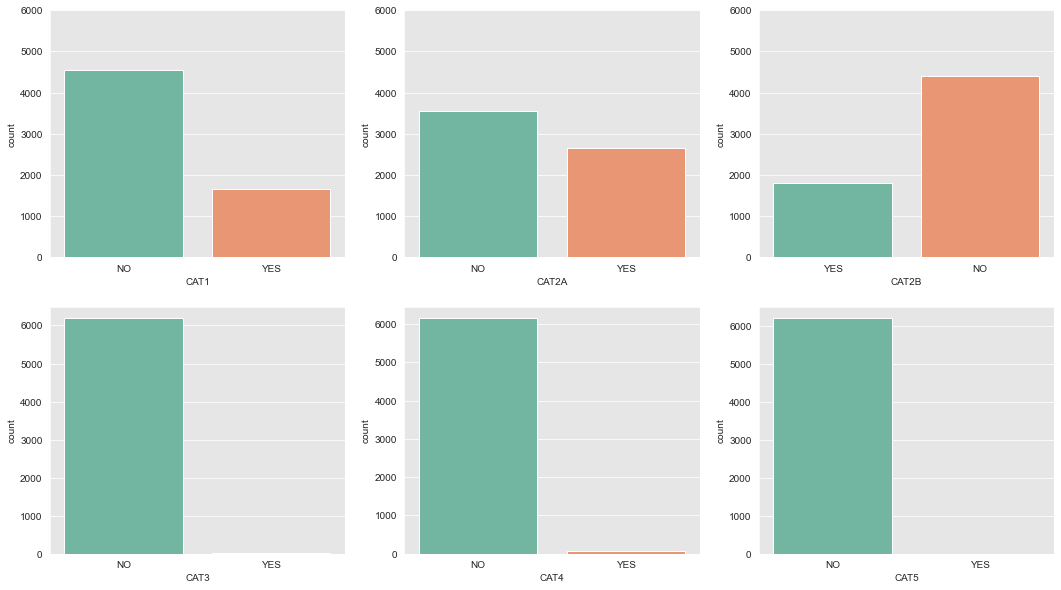

In [22]:
# Plot CAT
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18,10))

sns.countplot(x='CAT1', data=covid, palette='Set2', ax=ax1)
ax1.set_ylim(bottom=0, top=6000)
sns.countplot(x='CAT2A', data=covid, palette='Set2', ax=ax2)
ax2.set_ylim(bottom=0, top=6000)
sns.countplot(x='CAT2B', data=covid, palette='Set2', ax=ax3)
ax3.set_ylim(bottom=0, top=6000)
sns.countplot(x='CAT3', data=covid, palette='Set2', ax=ax4)
sns.countplot(x='CAT4', data=covid, palette='Set2', ax=ax5)
sns.countplot(x='CAT5', data=covid, palette='Set2', ax=ax6)


In [23]:
# # Plot how many type of vaccines
# g = sns.barplot(data=covid, y='AGE', x='TYPE OF VACCINE', hue='GENDER', )
# sns.despine(left=True)

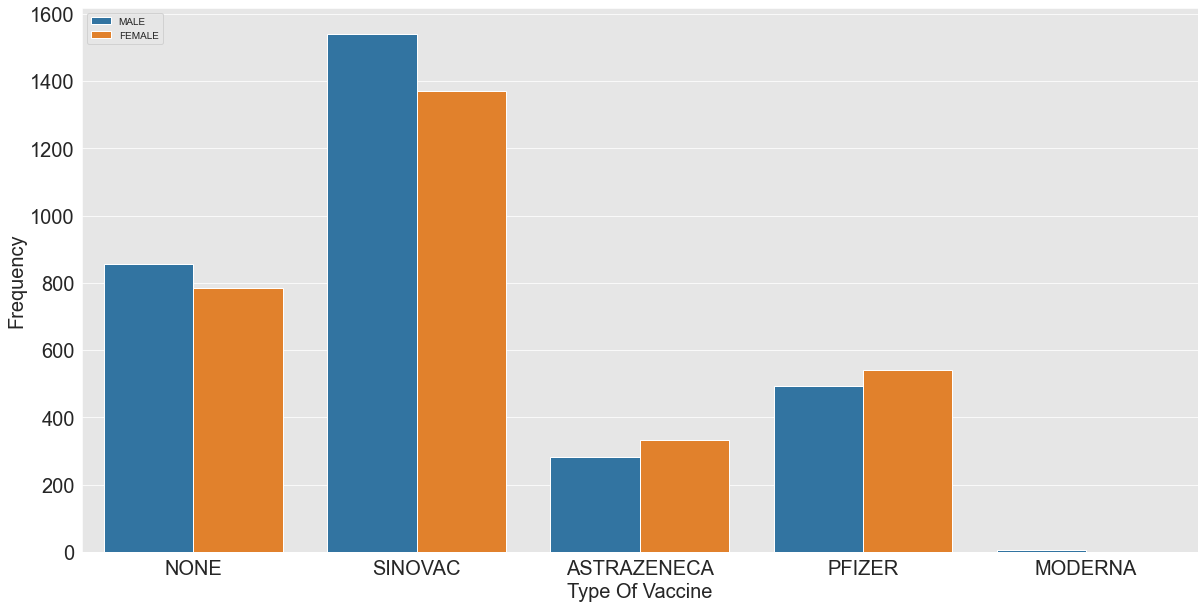

In [24]:
# Visualization looks bigger
# Put this code where seaborn code is located
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20,10)

ax = sns.countplot(x="TYPE OF VACCINE", hue="GENDER", data=covid)
ax.set_xlabel("Type Of Vaccine", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)
ax.tick_params(labelsize=20)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


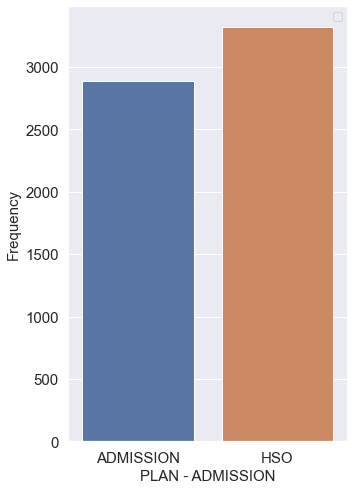

In [25]:
sns.set(rc = {'figure.figsize':(5,8)})

ax = sns.countplot(x="PLAN", data=covid)
ax.set_xlabel("PLAN - ADMISSION", fontsize = 15)
ax.set_ylabel("Frequency", fontsize = 15)
ax.tick_params(labelsize=15)
plt.legend()

In [26]:
covid.columns

Index(['AGE', 'GENDER', 'Test_PCR', 'Test_RTK', 'Test_Kit', 'CAT1', 'CAT2A',
       'CAT2B', 'CAT3', 'CAT4', 'CAT5', 'WORKPLACE', 'DAY OF ILLNESS',
       'VACCINATED', 'HAS_VACCED', 'NO_VACCED', 'TYPE OF VACCINE',
       'ASTRAZENECA', 'MODERNA', 'PFIZER', 'SINOVAC', 'BMI', 'OBESITY',
       'CARDIOVASCULAR ', 'DIABETES', 'HEART ', 'MATERNAL', 'KIDNEY ',
       'RESPIRATORY ', 'AUTOIMMUNE ', 'BLOOD ', 'CHOLESTROL', 'DIGESTIVE ',
       'DISABILITY (OKU)', 'DRUGS ALLERGY', 'FOODS ALLERGY', 'GENETIC ',
       'HEART ABNORMAL', 'HORMONE ', 'MENTAL ', 'NEUROLOGICAL ',
       'SKIN ALLERGY', 'SKIN ', 'SYSTEMIC ', 'THYROID ', 'COVID HISTORY',
       'ARTHRITIS', 'PLAN'],
      dtype='object')

In [27]:
# Remove unimportant features
covid = covid.drop(['Test_PCR','Test_RTK','Test_Kit','WORKPLACE','DAY OF ILLNESS', 'VACCINATED','HAS_VACCED','NO_VACCED','ASTRAZENECA','MODERNA','PFIZER','SINOVAC','AUTOIMMUNE ','BLOOD ','CHOLESTROL','DIGESTIVE ','DISABILITY (OKU)','DRUGS ALLERGY','FOODS ALLERGY','GENETIC ','HEART ABNORMAL','HORMONE ','MENTAL ','NEUROLOGICAL ','SKIN ALLERGY','SKIN ','SYSTEMIC ','THYROID ','COVID HISTORY','ARTHRITIS'], axis = 1)

In [28]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 0 to 6213
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AGE              6208 non-null   int64 
 1   GENDER           6208 non-null   object
 2   CAT1             6208 non-null   object
 3   CAT2A            6208 non-null   object
 4   CAT2B            6208 non-null   object
 5   CAT3             6208 non-null   object
 6   CAT4             6208 non-null   object
 7   CAT5             6208 non-null   object
 8   TYPE OF VACCINE  6208 non-null   object
 9   BMI              6208 non-null   int64 
 10  OBESITY          6208 non-null   object
 11  CARDIOVASCULAR   6208 non-null   object
 12  DIABETES         6208 non-null   object
 13  HEART            6208 non-null   object
 14  MATERNAL         6208 non-null   object
 15  KIDNEY           6208 non-null   object
 16  RESPIRATORY      6208 non-null   object
 17  PLAN             6208 non-null   

# Feature Engineering

In [29]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 0 to 6213
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AGE              6208 non-null   int64 
 1   GENDER           6208 non-null   object
 2   CAT1             6208 non-null   object
 3   CAT2A            6208 non-null   object
 4   CAT2B            6208 non-null   object
 5   CAT3             6208 non-null   object
 6   CAT4             6208 non-null   object
 7   CAT5             6208 non-null   object
 8   TYPE OF VACCINE  6208 non-null   object
 9   BMI              6208 non-null   int64 
 10  OBESITY          6208 non-null   object
 11  CARDIOVASCULAR   6208 non-null   object
 12  DIABETES         6208 non-null   object
 13  HEART            6208 non-null   object
 14  MATERNAL         6208 non-null   object
 15  KIDNEY           6208 non-null   object
 16  RESPIRATORY      6208 non-null   object
 17  PLAN             6208 non-null   

In [30]:
# Check unique value for each categorical dataset
for i in covid.columns:
    if covid.dtypes[i] == 'object':
        print("Column: {}".format(i))
        print(covid[i].unique())

Column: GENDER
['MALE' 'FEMALE']
Column: CAT1
['NO' 'YES']
Column: CAT2A
['NO' 'YES']
Column: CAT2B
['YES' 'NO']
Column: CAT3
['NO' 'YES']
Column: CAT4
['NO' 'YES']
Column: CAT5
['NO' 'YES']
Column: TYPE OF VACCINE
['NONE' 'SINOVAC' 'ASTRAZENECA' 'PFIZER' 'MODERNA']
Column: OBESITY
['YES' 'NO']
Column: CARDIOVASCULAR 
['NO' 'YES']
Column: DIABETES
['NO' 'YES']
Column: HEART 
['NO' 'YES']
Column: MATERNAL
['NO' 'YES']
Column: KIDNEY 
['NO' 'YES']
Column: RESPIRATORY 
['NO' 'YES']
Column: PLAN
['ADMISSION' 'HSO']


In [31]:
# Replace value YES = 1, NO = 0
covid = covid.replace('YES', 1)
covid = covid.replace('NO', 0)

In [32]:
covid.head()

,AGE,GENDER,CAT1,CAT2A,CAT2B,CAT3,CAT4,CAT5,TYPE OF VACCINE,BMI,OBESITY,CARDIOVASCULAR,DIABETES,HEART,MATERNAL,KIDNEY,RESPIRATORY,PLAN
0,17,MALE,0,0,1,0,0,0,NONE,30,1,0,0,0,0,0,0,ADMISSION
1,1,FEMALE,0,0,1,0,0,0,NONE,30,1,0,0,0,0,0,0,ADMISSION
2,3,MALE,0,0,1,0,0,0,NONE,30,1,0,0,0,0,0,0,ADMISSION
3,1,MALE,0,0,1,0,0,0,NONE,30,1,0,0,0,0,0,0,ADMISSION
4,4,FEMALE,0,0,1,0,0,0,NONE,30,1,0,0,0,0,0,0,ADMISSION


In [33]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 0 to 6213
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AGE              6208 non-null   int64 
 1   GENDER           6208 non-null   object
 2   CAT1             6208 non-null   int64 
 3   CAT2A            6208 non-null   int64 
 4   CAT2B            6208 non-null   int64 
 5   CAT3             6208 non-null   int64 
 6   CAT4             6208 non-null   int64 
 7   CAT5             6208 non-null   int64 
 8   TYPE OF VACCINE  6208 non-null   object
 9   BMI              6208 non-null   int64 
 10  OBESITY          6208 non-null   int64 
 11  CARDIOVASCULAR   6208 non-null   int64 
 12  DIABETES         6208 non-null   int64 
 13  HEART            6208 non-null   int64 
 14  MATERNAL         6208 non-null   int64 
 15  KIDNEY           6208 non-null   int64 
 16  RESPIRATORY      6208 non-null   int64 
 17  PLAN             6208 non-null   

In [34]:
# Check unique value for each categorical dataset
for i in covid.columns:
    if covid.dtypes[i] == 'object':
        print("Column: {}".format(i))
        print(covid[i].unique())

Column: GENDER
['MALE' 'FEMALE']
Column: TYPE OF VACCINE
['NONE' 'SINOVAC' 'ASTRAZENECA' 'PFIZER' 'MODERNA']
Column: PLAN
['ADMISSION' 'HSO']


In [35]:
# from sklearn.preprocessing import OneHotEncoder

In [36]:
# # Create an instance for one hot encoding
# ohe = OneHotEncoder(handle_unknown='ignore')


In [37]:
# Change into one hot encoding
covid = pd.get_dummies(covid, columns=["GENDER", "TYPE OF VACCINE"])

In [38]:
covid.columns

Index(['AGE', 'CAT1', 'CAT2A', 'CAT2B', 'CAT3', 'CAT4', 'CAT5', 'BMI',
       'OBESITY', 'CARDIOVASCULAR ', 'DIABETES', 'HEART ', 'MATERNAL',
       'KIDNEY ', 'RESPIRATORY ', 'PLAN', 'GENDER_FEMALE', 'GENDER_MALE',
       'TYPE OF VACCINE_ASTRAZENECA', 'TYPE OF VACCINE_MODERNA',
       'TYPE OF VACCINE_NONE', 'TYPE OF VACCINE_PFIZER',
       'TYPE OF VACCINE_SINOVAC'],
      dtype='object')

In [39]:
covid.loc[covid['AGE'], ['TYPE OF VACCINE_ASTRAZENECA', 'TYPE OF VACCINE_MODERNA', 'TYPE OF VACCINE_NONE', 'TYPE OF VACCINE_PFIZER', 'TYPE OF VACCINE_SINOVAC']]

,TYPE OF VACCINE_ASTRAZENECA,TYPE OF VACCINE_MODERNA,TYPE OF VACCINE_NONE,TYPE OF VACCINE_PFIZER,TYPE OF VACCINE_SINOVAC
17,0,0,0,0,1
1,0,0,1,0,0
3,0,0,1,0,0
1,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
56,0,0,0,0,1
46,0,0,0,1,0
1,0,0,1,0,0
31,0,0,0,1,0


In [40]:
# drop column TYPE OF VACCINE_NONE, 'GENDER_FEMALE'
covid.drop('GENDER_FEMALE', axis=1, inplace=True)
covid.drop('TYPE OF VACCINE_NONE', axis=1, inplace=True)
covid.columns

Index(['AGE', 'CAT1', 'CAT2A', 'CAT2B', 'CAT3', 'CAT4', 'CAT5', 'BMI',
       'OBESITY', 'CARDIOVASCULAR ', 'DIABETES', 'HEART ', 'MATERNAL',
       'KIDNEY ', 'RESPIRATORY ', 'PLAN', 'GENDER_MALE',
       'TYPE OF VACCINE_ASTRAZENECA', 'TYPE OF VACCINE_MODERNA',
       'TYPE OF VACCINE_PFIZER', 'TYPE OF VACCINE_SINOVAC'],
      dtype='object')

In [41]:
# Change to numeric -> "PLAN"
covid = covid.replace('ADMISSION', 1)
covid = covid.replace('HSO', 0)

In [42]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 0 to 6213
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   AGE                          6208 non-null   int64
 1   CAT1                         6208 non-null   int64
 2   CAT2A                        6208 non-null   int64
 3   CAT2B                        6208 non-null   int64
 4   CAT3                         6208 non-null   int64
 5   CAT4                         6208 non-null   int64
 6   CAT5                         6208 non-null   int64
 7   BMI                          6208 non-null   int64
 8   OBESITY                      6208 non-null   int64
 9   CARDIOVASCULAR               6208 non-null   int64
 10  DIABETES                     6208 non-null   int64
 11  HEART                        6208 non-null   int64
 12  MATERNAL                     6208 non-null   int64
 13  KIDNEY                       6208 non-null   int

In [43]:
covid['PLAN'].value_counts()

0    3320
1    2888
Name: PLAN, dtype: int64

In [44]:
covid.columns

Index(['AGE', 'CAT1', 'CAT2A', 'CAT2B', 'CAT3', 'CAT4', 'CAT5', 'BMI',
       'OBESITY', 'CARDIOVASCULAR ', 'DIABETES', 'HEART ', 'MATERNAL',
       'KIDNEY ', 'RESPIRATORY ', 'PLAN', 'GENDER_MALE',
       'TYPE OF VACCINE_ASTRAZENECA', 'TYPE OF VACCINE_MODERNA',
       'TYPE OF VACCINE_PFIZER', 'TYPE OF VACCINE_SINOVAC'],
      dtype='object')

In [45]:
covid.head()

,AGE,CAT1,CAT2A,CAT2B,CAT3,CAT4,CAT5,BMI,OBESITY,CARDIOVASCULAR,...,HEART,MATERNAL,KIDNEY,RESPIRATORY,PLAN,GENDER_MALE,TYPE OF VACCINE_ASTRAZENECA,TYPE OF VACCINE_MODERNA,TYPE OF VACCINE_PFIZER,TYPE OF VACCINE_SINOVAC
0,17,0,0,1,0,0,0,30,1,0,...,0,0,0,0,1,1,0,0,0,0
1,1,0,0,1,0,0,0,30,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0,0,1,0,0,0,30,1,0,...,0,0,0,0,1,1,0,0,0,0
3,1,0,0,1,0,0,0,30,1,0,...,0,0,0,0,1,1,0,0,0,0
4,4,0,0,1,0,0,0,30,1,0,...,0,0,0,0,1,0,0,0,0,0


In [46]:
covid_total = covid.sum(axis = 0, skipna = True)
covid_total

AGE                            193042
CAT1                             1668
CAT2A                            2654
CAT2B                            1794
CAT3                               25
CAT4                               64
CAT5                                3
BMI                            166705
OBESITY                          1506
CARDIOVASCULAR                      4
DIABETES                          431
HEART                             475
MATERNAL                           56
KIDNEY                             34
RESPIRATORY                       262
PLAN                             2888
GENDER_MALE                      3175
TYPE OF VACCINE_ASTRAZENECA       616
TYPE OF VACCINE_MODERNA             4
TYPE OF VACCINE_PFIZER           1034
TYPE OF VACCINE_SINOVAC          2911
dtype: int64

# Train Model

In [47]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 0 to 6213
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   AGE                          6208 non-null   int64
 1   CAT1                         6208 non-null   int64
 2   CAT2A                        6208 non-null   int64
 3   CAT2B                        6208 non-null   int64
 4   CAT3                         6208 non-null   int64
 5   CAT4                         6208 non-null   int64
 6   CAT5                         6208 non-null   int64
 7   BMI                          6208 non-null   int64
 8   OBESITY                      6208 non-null   int64
 9   CARDIOVASCULAR               6208 non-null   int64
 10  DIABETES                     6208 non-null   int64
 11  HEART                        6208 non-null   int64
 12  MATERNAL                     6208 non-null   int64
 13  KIDNEY                       6208 non-null   int

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [49]:
# Split into features and label
y = covid['PLAN']
X = covid.drop(['PLAN'], axis=1)

# Feature Selection
## SelectKBest

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [51]:
# Applying SelectKBest to extract top 10 best features
best_feature = SelectKBest(score_func=chi2, k=10)
fit = best_feature.fit(X,y)

covid_score = pd.DataFrame(fit.scores_)
covid_column = pd.DataFrame(X.columns)

# concate two dataframe for better visualization
feature_score = pd.concat([covid_column, covid_score], axis=1)
# naming column
feature_score.columns = ['Column', 'Score']
# print 10 features
print(feature_score.nlargest(10, 'Score'))

          Column        Score
0            AGE  2770.298057
3          CAT2B  2062.354571
8        OBESITY  1731.274238
1           CAT1   595.143662
11        HEART    546.052632
7            BMI   502.196019
10      DIABETES   495.470914
2          CAT2A   396.483787
14  RESPIRATORY    280.078828
5           CAT4    73.573407


## Extra Tree Classifier 

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

[1.23577586e-02 7.45709688e-02 6.39710220e-02 2.98400604e-01
 2.36922000e-03 5.60273335e-03 6.36126332e-05 5.99388630e-02
 2.22078216e-01 1.78532708e-04 9.90579850e-02 1.06966300e-01
 5.14769308e-04 3.30120131e-03 4.81838782e-02 5.28736794e-04
 3.89338921e-04 7.95275445e-06 2.61033560e-04 1.25727370e-03]


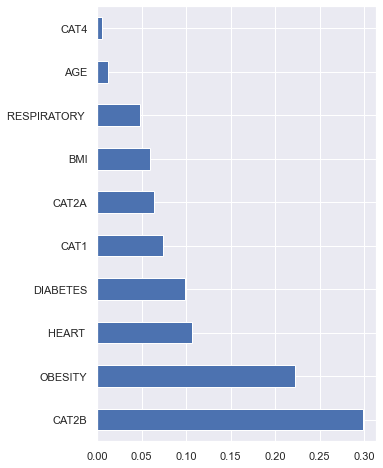

In [53]:
model_tree = ExtraTreesClassifier()
model_tree.fit(X,y)
print(model_tree.feature_importances_)

# plot graph of feature importances for better visualization
feature_important = pd.Series(model_tree.feature_importances_, index=X.columns)
feature_important.nlargest(10).plot(kind='barh')
plt.show()

## Heatmap

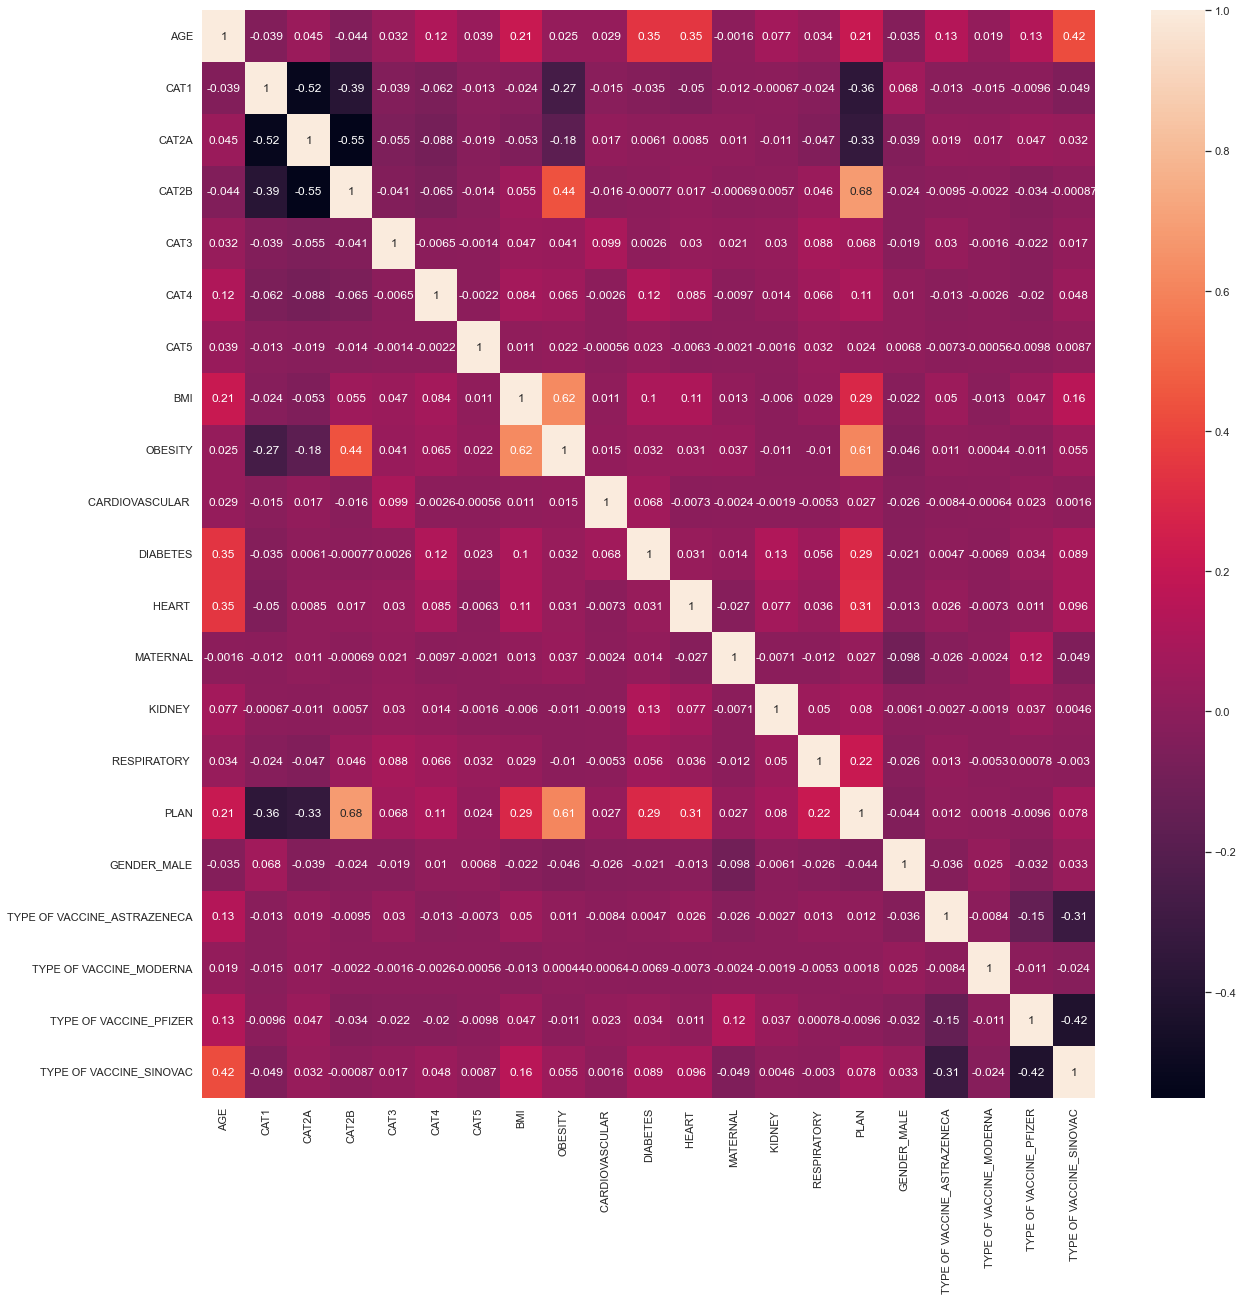

In [54]:
# get corrleation of each features in dataset
corrmat = covid.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))
# plot heatmap
g = sns.heatmap(covid[top_corr_feature].corr(), annot=True)

# Use these features
feature selection [graph] = 'CAT2B', 'OBESITY', 'HEART' , 'DIABETES', 'CAT1'

Subject expert = MATERNAL, OBESITY, CARDIO, KIDNEY, HEART, DIABETES
    
<b>We choose 'MATERNAL', 'OBESITY', 'CARDIOVASCULAR', 'KIDNEY', 'HEART', 'DIABETES', 'CAT2B', 'CAT2A', 'CAT1', 'AGE', 'GENDER_MALE', 'RESPIRATORY'

In [88]:
X.columns

Index(['AGE', 'CAT1', 'CAT2A', 'CAT2B', 'CAT3', 'CAT4', 'CAT5', 'BMI',
       'OBESITY', 'CARDIOVASCULAR ', 'DIABETES', 'HEART ', 'MATERNAL',
       'KIDNEY ', 'RESPIRATORY ', 'GENDER_MALE', 'TYPE OF VACCINE_ASTRAZENECA',
       'TYPE OF VACCINE_MODERNA', 'TYPE OF VACCINE_PFIZER',
       'TYPE OF VACCINE_SINOVAC'],
      dtype='object')

In [89]:
# (Optional) rename column
covid.rename(columns={'HEART ': 'HEART', 'CARDIOVASCULAR ':'CARDIOVASCULAR', 'KIDNEY ':'KIDNEY', 'RESPIRATORY ':'RESPIRATORY'}, inplace=True)

In [90]:
covid.columns

Index(['AGE', 'CAT1', 'CAT2A', 'CAT2B', 'CAT3', 'CAT4', 'CAT5', 'BMI',
       'OBESITY', 'CARDIOVASCULAR', 'DIABETES', 'HEART', 'MATERNAL', 'KIDNEY',
       'RESPIRATORY', 'PLAN', 'GENDER_MALE', 'TYPE OF VACCINE_ASTRAZENECA',
       'TYPE OF VACCINE_MODERNA', 'TYPE OF VACCINE_PFIZER',
       'TYPE OF VACCINE_SINOVAC'],
      dtype='object')

In [91]:
y_best_feature = covid['PLAN']
X_best_feature = covid[['MATERNAL', 'OBESITY', 'CARDIOVASCULAR', 'KIDNEY', 'HEART', 'DIABETES', 'CAT2B', 'CAT2A', 'CAT1', 'AGE', 'GENDER_MALE', 'RESPIRATORY']]

In [92]:
# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# Print the shape size of train dataset
print(X_train.shape, y_train.shape)

# Print the shape size of test dataset
print(X_test.shape, y_test.shape)

(4345, 20) (4345,)
(1863, 20) (1863,)


In [93]:
# Perform feature scaling for feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

# linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
model_lr = LogisticRegression()

# fit training data
model_lr.fit(X_train, y_train)

LogisticRegression()

In [64]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix

In [65]:
# train
lr_prediction_train = model_lr.predict(X_train)

# print confusion matrix
print("Confusion matrix for training:\n", confusion_matrix(y_train, lr_prediction_train))

# accuracy score
print("Accuracy for training: ", accuracy_score(y_train, lr_prediction_train))

# Classification report
print("Classification report for training:\n",
      classification_report(y_train, lr_prediction_train))

Confusion matrix for training:
 [[2348    3]
 [   2 1992]]
Accuracy for training:  0.998849252013809
Classification report for training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2351
           1       1.00      1.00      1.00      1994

    accuracy                           1.00      4345
   macro avg       1.00      1.00      1.00      4345
weighted avg       1.00      1.00      1.00      4345



In [66]:
# test
lr_prediction_test = model_lr.predict(X_test)

# print confusion matrix
print("Confusion matrix for testing:\n", confusion_matrix(y_test, lr_prediction_test))

# accuracy score
print("Accuracy for testing: ", accuracy_score(y_test, lr_prediction_test))

# Classification report
print("Classification report for testing: \n",
      classification_report(y_test, lr_prediction_test))

Confusion matrix for testing:
 [[967   2]
 [  1 893]]
Accuracy for testing:  0.998389694041868
Classification report for testing: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       969
           1       1.00      1.00      1.00       894

    accuracy                           1.00      1863
   macro avg       1.00      1.00      1.00      1863
weighted avg       1.00      1.00      1.00      1863



# Support Vector Machine (SVM)

In [67]:
# Support Vector Machine
from sklearn.svm import SVC

In [68]:
# linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [69]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, X_train, y_train, cv = 10, scoring='f1')

print('Cross-validation scores:{}'.format(scores))
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.99749373 1.         0.995      1.         1.         1.
 0.99749373 1.         1.         0.99749373]
Average cross-validation score: 0.9987


In [96]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, X_test, y_test, cv = 10, scoring='f1')

print('Cross-validation scores:{}'.format(scores))
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[1.         0.99441341 1.         1.         1.         0.99441341
 1.         1.         0.99441341 1.        ]
Average cross-validation score: 0.9983


In [70]:
# train
svm_prediction_train = svm_model.predict(X_train)

# print confusion matrix
print("Confusion matrix for training:\n", confusion_matrix(y_train, svm_prediction_train))

# accuracy score
print("Accuracy for training: ", accuracy_score(y_train, svm_prediction_train))

# Classification report
print("Classification report for training:\n",
      classification_report(y_train, svm_prediction_train))

Confusion matrix for training:
 [[2348    3]
 [   2 1992]]
Accuracy for training:  0.998849252013809
Classification report for training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2351
           1       1.00      1.00      1.00      1994

    accuracy                           1.00      4345
   macro avg       1.00      1.00      1.00      4345
weighted avg       1.00      1.00      1.00      4345



In [71]:
# test
svm_prediction_test = svm_model.predict(X_test)

# print confusion matrix
print("Confusion matrix for training:\n", confusion_matrix(y_test, svm_prediction_test))

# accuracy score
print("Accuracy for testing: ", accuracy_score(y_test, svm_prediction_test))

# Classification report
print("Classification report for training: \n",
      classification_report(y_test, svm_prediction_test))

Confusion matrix for training:
 [[967   2]
 [  1 893]]
Accuracy for testing:  0.998389694041868
Classification report for training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       969
           1       1.00      1.00      1.00       894

    accuracy                           1.00      1863
   macro avg       1.00      1.00      1.00      1863
weighted avg       1.00      1.00      1.00      1863



# Naive Bayes Classifier

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
# model 
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [74]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb_model, X_train, y_train, cv = 10, scoring='f1')

print('Cross-validation scores:{}'.format(scores))
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.99749373 1.         0.9925187  1.         1.         1.
 0.99497487 0.99749373 1.         0.99749373]
Average cross-validation score: 0.9980


In [95]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb_model, X_test, y_test, cv = 10, scoring='f1')

print('Cross-validation scores:{}'.format(scores))
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[1.         0.99441341 1.         1.         1.         0.99441341
 1.         1.         0.99441341 1.        ]
Average cross-validation score: 0.9983


In [75]:
# train
gnb_prediction_train = gnb_model.predict(X_train)

# print confusion matrix
print("Confusion matrix for training:\n", confusion_matrix(y_train, gnb_prediction_train))

# accuracy score
print("Accuracy for training: ", accuracy_score(y_train, gnb_prediction_train))

# Classification report
print("Classification report for training:\n",
      classification_report(y_train, gnb_prediction_train))

Confusion matrix for training:
 [[2348    3]
 [   2 1992]]
Accuracy for training:  0.998849252013809
Classification report for training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2351
           1       1.00      1.00      1.00      1994

    accuracy                           1.00      4345
   macro avg       1.00      1.00      1.00      4345
weighted avg       1.00      1.00      1.00      4345



In [76]:
# test
gnb_prediction_test = gnb_model.predict(X_test)

# print confusion matrix
print("Confusion matrix for training:\n", confusion_matrix(y_test, gnb_prediction_test))

# accuracy score
print("Accuracy for testing: ", accuracy_score(y_test, gnb_prediction_test))

# Classification report
print("Classification report for training: \n",
      classification_report(y_test, gnb_prediction_test))

Confusion matrix for training:
 [[967   2]
 [  1 893]]
Accuracy for testing:  0.998389694041868
Classification report for training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       969
           1       1.00      1.00      1.00       894

    accuracy                           1.00      1863
   macro avg       1.00      1.00      1.00      1863
weighted avg       1.00      1.00      1.00      1863



# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

# model 
rf_model = RandomForestClassifier()

In [78]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train, y_train, cv = 10, scoring='f1')

print('Cross-validation scores:{}'.format(scores))
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.99749373 1.         0.9924812  1.         1.         0.99748111
 0.99749373 1.         1.         0.99497487]
Average cross-validation score: 0.9980


In [97]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_test, y_test, cv = 10, scoring='f1')

print('Cross-validation scores:{}'.format(scores))
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[1.         0.99441341 1.         1.         1.         0.99441341
 0.99441341 1.         0.99441341 0.98876404]
Average cross-validation score: 0.9966


In [80]:
# train
rf_prediction_train = rf_model.predict(X_train)

# print confusion matrix
print("Confusion matrix for training:\n", confusion_matrix(y_train, rf_prediction_train))

# accuracy score
print("Accuracy for training: ", accuracy_score(y_train, rf_prediction_train))

# Classification report
print("Classification report for training:\n",
      classification_report(y_train, rf_prediction_train))

Confusion matrix for training:
 [[2351    0]
 [   0 1994]]
Accuracy for training:  1.0
Classification report for training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2351
           1       1.00      1.00      1.00      1994

    accuracy                           1.00      4345
   macro avg       1.00      1.00      1.00      4345
weighted avg       1.00      1.00      1.00      4345



In [81]:
# test
rf_prediction_test = rf_model.predict(X_test)

# print confusion matrix
print("Confusion matrix for training:\n", confusion_matrix(y_train, rf_prediction_train))

# accuracy score
print("Accuracy for testing: ", accuracy_score(y_test, rf_prediction_test))

# Classification report
print("Classification report for training: \n",
      classification_report(y_test, rf_prediction_test))

Confusion matrix for training:
 [[2351    0]
 [   0 1994]]
Accuracy for testing:  0.9978529253891573
Classification report for training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       969
           1       1.00      1.00      1.00       894

    accuracy                           1.00      1863
   macro avg       1.00      1.00      1.00      1863
weighted avg       1.00      1.00      1.00      1863



# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
 
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth = 6,min_samples_split=2, min_samples_leaf=1, random_state=0)

In [83]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [98]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.99770115 0.9954023  0.9908046  0.9954023  0.99770115 0.98847926
 0.98847926 0.99769585 0.99539171 0.99308756]
Average cross-validation score: 0.9940


In [99]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_model, X_test, y_test, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.97860963 0.98930481 0.99465241 1.         0.97849462 0.99462366
 1.         0.99462366 0.98387097 0.98924731]
Average cross-validation score: 0.9903


In [100]:
# train
dt_prediction_train = dt_model.predict(X_train)

# print confusion matrix
print("Confusion matrix for training:\n", confusion_matrix(y_train, dt_prediction_train))

# accuracy score
print("Accuracy for training: ", accuracy_score(y_train, dt_prediction_train))

# Classification report
print("Classification report for training:\n",
      classification_report(y_train, dt_prediction_train))

Confusion matrix for training:
 [[2348    3]
 [  12 1982]]
Accuracy for training:  0.996547756041427
Classification report for training:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2351
           1       1.00      0.99      1.00      1994

    accuracy                           1.00      4345
   macro avg       1.00      1.00      1.00      4345
weighted avg       1.00      1.00      1.00      4345



In [101]:
# test
dt_prediction_test = dt_model.predict(X_test)

# print confusion matrix
print("Confusion matrix for training:\n", confusion_matrix(y_train, dt_prediction_train))

# accuracy score
print("Accuracy for testing: ", accuracy_score(y_test, dt_prediction_test))

# Classification report
print("Classification report for training: \n",
      classification_report(y_test, dt_prediction_test))

Confusion matrix for training:
 [[2348    3]
 [  12 1982]]
Accuracy for testing:  0.9967793880837359
Classification report for training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       969
           1       1.00      1.00      1.00       894

    accuracy                           1.00      1863
   macro avg       1.00      1.00      1.00      1863
weighted avg       1.00      1.00      1.00      1863



# PCA 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# We want 90% variablity number of component
pca = PCA(n_components=0.9)

In [ ]:
# Applied PCA on train and test set
pca_xtrain = pca.fit_transform(X_train)
pca_xtest = pca.transform(X_test)

In [ ]:
# number of component use in train
pca.fit_transform(X_train)
pca.n_components_

In [ ]:
# visualize the suitable number of principal component
plt.figure(figsize=(10, 5))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Percentage Of Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
# plt.ylim(0, 100)
# plt.xlim(0, 30)


In [ ]:
# number of component use in test
pca.fit_transform(X_test)
pca.n_components_

In [ ]:
logistic_model = LogisticRegression()

# Fit model
logistic_model.fit(pca_xtrain, y_train)

In [ ]:
# train
prediction_train = logistic_model.predict(pca_xtrain)

# accuracy score
print("Accuracy for training: ", accuracy_score(y_train, prediction_train))

# Classification report
print("Classification report for training:\n",
      classification_report(y_train, prediction_train))

In [ ]:
# test
prediction_test = logistic_model.predict(pca_xtest)

# accuracy score
print("Accuracy for training: ", accuracy_score(y_test, prediction_test))

# Classification report
print("Classification report for training:\n",
      classification_report(y_test, prediction_test))